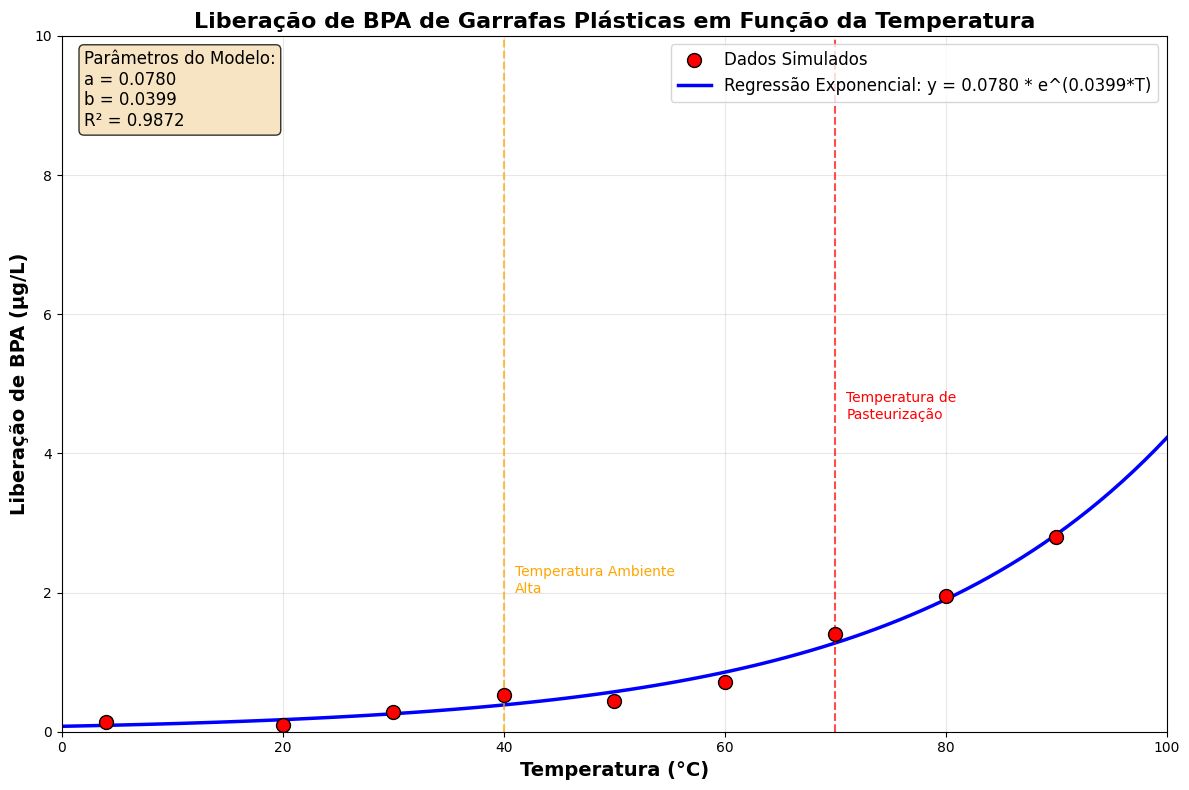


Tabela de Dados Simulados:
   Temperatura (°C)  BPA Liberado (μg/L)
0                 4                0.134
1                20                0.102
2                30                0.290
3                40                0.531
4                50                0.439
5                60                0.709
6                70                1.404
7                80                1.945
8                90                2.799

Equação do Modelo: y = 0.0780 * e^(0.0399*T)
Coeficiente de Determinação (R²): 0.9872


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Configuração para gráficos e impressão com estilo científico
plt.style.use('default')
np.random.seed(42)  # Para resultados reproduzíveis

# Função exponencial para o modelo de liberação de BPA
def modelo_liberacao_bpa(T, a, b):
    """Modelo exponencial para liberação de BPA em função da temperatura"""
    return a * np.exp(b * T)

# Gerando dados sintéticos baseados em estudos reais de migração de BPA
temperaturas = np.array([4, 20, 30, 40, 50, 60, 70, 80, 90])  # Temperaturas em °C

# Parâmetros baseados em literatura científica (valores representativos)
a_real = 0.05  # Coeficiente base
b_real = 0.045  # Coeficiente de taxa

# Gerando valores "reais" de liberação de BPA
liberacao_real = modelo_liberacao_bpa(temperaturas, a_real, b_real)

# Adicionando ruído aleatório para simular variação experimental
ruido = np.random.normal(0, 0.15, len(temperaturas))
liberacao_medida = liberacao_real + ruido

# Ajustando a curva exponencial aos dados
params, covariance = curve_fit(modelo_liberacao_bpa, temperaturas, liberacao_medida, p0=[0.05, 0.04])
a_ajustado, b_ajustado = params

# Criando temperaturas para a curva de regressão suave
temperaturas_suave = np.linspace(0, 100, 100)
liberacao_prevista = modelo_liberacao_bpa(temperaturas_suave, a_ajustado, b_ajustado)

# Calculando R²
residuos = liberacao_medida - modelo_liberacao_bpa(temperaturas, a_ajustado, b_ajustado)
sse = np.sum(residuos**2)
sst = np.sum((liberacao_medida - np.mean(liberacao_medida))**2)
r2 = 1 - (sse / sst)

# Criando o gráfico
plt.figure(figsize=(12, 8))

# Plotando dados medidos
plt.scatter(temperaturas, liberacao_medida, color='red', s=100, zorder=5, 
            label='Dados Simulados', edgecolors='black')

# Plotando curva de regressão
plt.plot(temperaturas_suave, liberacao_prevista, 'b-', linewidth=2.5, 
         label=f'Regressão Exponencial: y = {a_ajustado:.4f} * e^({b_ajustado:.4f}*T)')

# Adicionando detalhes ao gráfico
plt.xlabel('Temperatura (°C)', fontsize=14, fontweight='bold')
plt.ylabel('Liberação de BPA (μg/L)', fontsize=14, fontweight='bold')
plt.title('Liberação de BPA de Garrafas Plásticas em Função da Temperatura', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Adicionando caixa de texto com parâmetros e R²
textstr = f'Parâmetros do Modelo:\na = {a_ajustado:.4f}\nb = {b_ajustado:.4f}\nR² = {r2:.4f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Adicionando anotações para temperaturas críticas
plt.axvline(x=40, color='orange', linestyle='--', alpha=0.7)
plt.text(41, 2.0, 'Temperatura Ambiente\nAlta', fontsize=10, color='orange')

plt.axvline(x=70, color='red', linestyle='--', alpha=0.7)
plt.text(71, 4.5, 'Temperatura de\nPasteurização', fontsize=10, color='red')

plt.xlim(0, 100)
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

# Criando tabela com os dados
print("\nTabela de Dados Simulados:")
dados = pd.DataFrame({
    'Temperatura (°C)': temperaturas,
    'BPA Liberado (μg/L)': liberacao_medida
})
print(dados.round(3))

print(f"\nEquação do Modelo: y = {a_ajustado:.4f} * e^({b_ajustado:.4f}*T)")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")